### **`Load Data From Kaggle `**

In [ ]:
# Optaining the Dataset (Gender Classification) From Kaggle
# Comment this partition after the 1st Run

# Install Kaggle Framework
! pip install -q kaggle
# Import Library for File Upload
from google.colab import files
# Upload the Files
files.upload()
# Create a New Folder
! mkdir ~/.kaggle
# Copy the Kaggle Profile .json Format file to the created directory
! cp kaggle.json ~/.kaggle/
# Change the Permission of the file to able it to run
! chmod 600 ~/.kaggle/kaggle.json
# Download the Chosen Dataset (Gender Classfication)
!kaggle datasets download --force  cashutosh/gender-classification-dataset
# Create new Folder for the Dataset
! mkdir dataset
# Extract the Downloaded Dataset in this folder
! unzip gender-classification-dataset.zip -d dataset

### **Display Some Images Randomly**

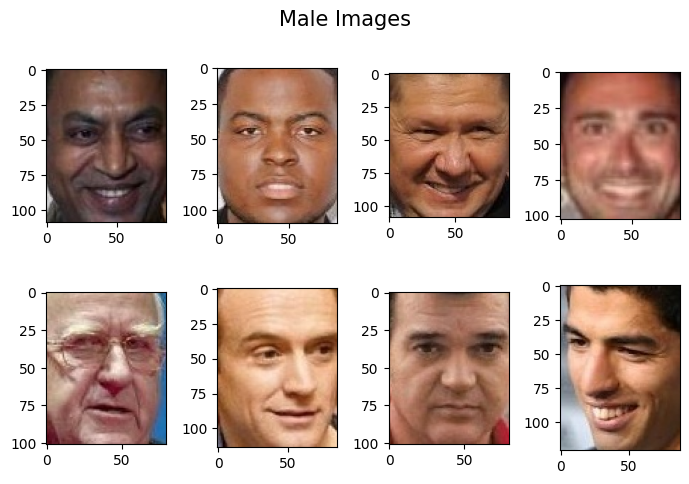

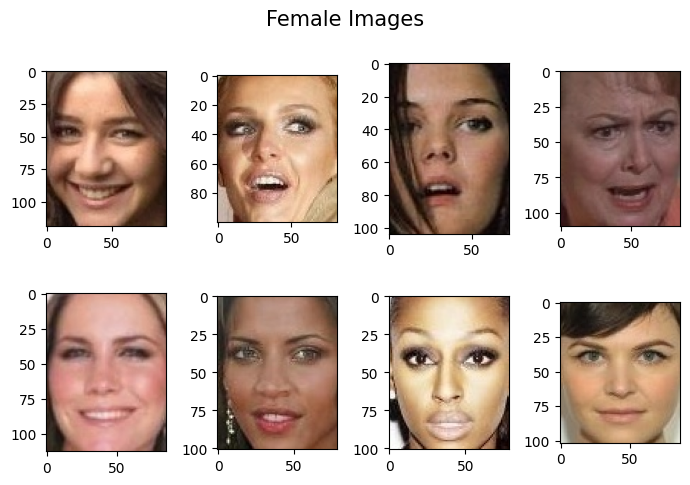

In [ ]:
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

# A Function to show 8 Random Images from each Gender
def show_image(Directory):
    plt.figure(figsize=(7,5))                         # The Size of the Displayed Random Images
    for x in range(8):                                # Loop Over 8 Random Images from each Category
        plt.subplot(2,4,x+1)                          # Plot 2 Rows * 4 Columns Grid of Images
        Image = random.choice(os.listdir(Directory))  # Choose a Random Image from the Dataset Directory
        Image = load_img(os.path.join(Directory,Image))   # Load the Chosen Image
        plt.subplots_adjust(hspace=0.3)               # Margin Space Between each Image
        x =Directory.split("Training")[-1]            # Seperate the Last Directory from the Full Path (Male/Female)
        if x == "/male":                              # If the Image is Chosen from the Male Folder
            plt.suptitle("Male Images",fontsize=15)
        else:                                         # If the Image is Chosen from the Female Folder
            plt.suptitle("Female Images",fontsize=15)
        plt.imshow(Image)                             # Plot the Grid of Chosen Images
    plt.tight_layout()                                # Adjust the Padding and the Grid Layout Display
train_male="dataset/Training/male"                    # Specify the Path of the Male Folder
train_female="dataset/Training/female"                # Specify the Path of the Female Folder
show_image(train_male)                                # Display the Male Data
show_image(train_female)                              # Display the Female Data

### **Data PreProccessing**

* "Configured a data augmentation pipeline for image data using TensorFlow and Keras, applying techniques like rotation, shifting, and flipping."

* "Loaded and preprocessed training and validation datasets from specified directories, preparing them for deep learning."

* "Class indices were generated to map class names to numerical labels, facilitating classification tasks. Ready to train models for image classification!"

In [ ]:
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from keras import regularizers
from keras import layers
from keras import utils
from keras.optimizers import Adam
import keras
import numpy as np
from keras import models

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
path_train = "dataset/Training/"        # Specify the Path of the Training Data
path_test = "dataset/Validation/"       # Specify the Path of the Validation Data

# Generate batches of tensor image data with data augmentation.
train_generator = ImageDataGenerator(rescale = 1/255.0,       # Multiply the Data by the provided Number
                                     rotation_range=45,       # Degree Range for Random Rotations
                                     height_shift_range=0.2,  # Fraction of the Total Height
                                     shear_range=0.2,         # Shear angle in counter-clockwise direction in degrees
                                     zoom_range=0.2,          # Range for Random Zoom
                                     validation_split=0.2,    # Fraction of images reserved for validation
                                     horizontal_flip=True)    # Randomly flip inputs horizontally

# Read the Images directly from the directory and augment them (Training Data)
train_data=train_generator.flow_from_directory(path_train,            # Provide the Training Set Path
                                            target_size=(150,150),    # The Pixel Number of the Target Image
                                            batch_size=32,            # Specify the Number of Images in each Batch
                                            class_mode='categorical', # Specify the Classification Mode
                                            color_mode='rgb',         # Specify (Red - Green - Blue) For Color Mode
                                            subset="training",        # Specify it as the Training Data
                                            shuffle=True)             # Shuffle the Training Data
                                            # Data isn't in the same order & the batches are not the exact same ones

# Read the Images directly from the directory and augment them (Testing Data)
val_data=train_generator.flow_from_directory(path_train, target_size=(150,150), batch_size=32,
                                           color_mode='rgb', class_mode='categorical', subset="validation")
train_data.class_indices

Found 37608 images belonging to 2 classes.
Found 9401 images belonging to 2 classes.


{'female': 0, 'male': 1}

## **CNN MODEL ( ACURRECY : 96% )**

1. Model Architecture: A convolutional neural network (CNN) model is defined for image classification. The model consists of multiple layers, including convolutional layers, max-pooling layers, a flattening layer, and fully connected layers.

2. Key Components: The model includes an input layer with a 3x3 convolutional filter and ReLU activation, followed by max-pooling layers. Three additional convolutional layers with increasing filter sizes are added, along with max-pooling layers to downsample the feature maps. The model also includes a flattening layer to transform the feature maps into a 1D array, fully connected layers with ReLU activation, a dropout layer to prevent overfitting, and an output layer with softmax activation for binary classification.

3. Model Summary: The model.summary() function provides a detailed summary of the model's architecture, including the number of parameters in each layer.

In [ ]:
# --------------------------
model=models.Sequential()   # Initializing the Model Object

# Input Layer (1st Layer)
model.add(layers.Conv2D(32,3,activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2))) # A 2*2 Pooling Window choosing the Max Value

# Adding 3 Convolutional Layers
model.add(Conv2D(64,3,activation='relu'))
model.add(layers.MaxPooling2D((2)))
model.add(Conv2D(128,3,activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,3,activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())  # Transfere the Grid into a 1 D Array
model.add(Dense(256,activation='relu'))   # Dense for creating a Fully Connected Layer
model.add(Dropout(0.1))                   # Remove Random Cells to prevent Overfitting
model.add(Dense(2,activation='softmax'))  # Create the Output Layer (Probability for each Class)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
from tensorflow.keras.optimizers import Adam
# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In this Code :
* Model Compilation: The code compiles a deep learning model using the Adam optimizer with a learning rate of 0.001. It specifies the categorical cross-entropy loss function for training and includes accuracy as a metric to monitor during training.

* Optimization and Metrics: The model is set up for efficient training with the chosen optimizer, and the choice of loss function and accuracy metric is defined to measure the model's performance.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a callback to save the model's weights after each epoch
checkpoint = ModelCheckpoint('model_checkpoint.h5', save_best_only=True)


# Fitting the Model
# Train Data, Steps/Epoch = N/Batch Size, Number of Epochs
# Validation Data, Validation Steps
# Train the model and use the checkpoint callback
model_Learnability = model.fit(train_data, steps_per_epoch=len(train_data), epochs=15,
                  validation_data=val_data, validation_steps=len(val_data),
                  callbacks=[checkpoint])


# Load the model weights
model.load_weights('model_checkpoint.h5')

Epoch 1/15
1176/1176 [==============================] - ETA: 0s - loss: 0.4883 - accuracy: 0.7658

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1176/1176 [==============================] - 360s 288ms/step - loss: 0.4883 - accuracy: 0.7658 - val_loss: 0.3748 - val_accuracy: 0.8414
Epoch 2/15
1176/1176 [==============================] - 310s 264ms/step - loss: 0.3381 - accuracy: 0.8581 - val_loss: 0.2689 - val_accuracy: 0.8925
Epoch 3/15
1176/1176 [==============================] - 324s 276ms/step - loss: 0.2421 - accuracy: 0.9039 - val_loss: 0.2029 - val_accuracy: 0.9234
Epoch 4/15
1176/1176 [==============================] - 305s 259ms/step - loss: 0.2104 - accuracy: 0.9168 - val_loss: 0.1881 - val_accuracy: 0.9289
Epoch 5/15
1176/1176 [==============================] - 304s 259ms/step - loss: 0.1951 - accuracy: 0.9250 - val_loss: 0.1847 - val_accuracy: 0.9322
Epoch 6/15
1176/1176 [==============================] - 306s 260ms/step - loss: 0.1826 - accuracy: 0.9308 - val_loss: 0.1714 - val_accuracy: 0.9377
Epoch 7/15
1176/1176 [==============================] - 303s 258ms/step - loss: 0.1774 - accuracy: 0.9327 - val_loss: 0.157

In [ ]:
model.save('model_Learnability.h5')

In [ ]:
import math
score = model.evaluate_generator(val_data)
print('Test loss:', score[0])
print('Test accuracy:', math.ceil(score[1]*100),'%')

<ipython-input-9-5054cb404f06>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(val_data)


Test loss: 0.14021556079387665
Test accuracy: 95 %


### **Training & validation Loss plot**

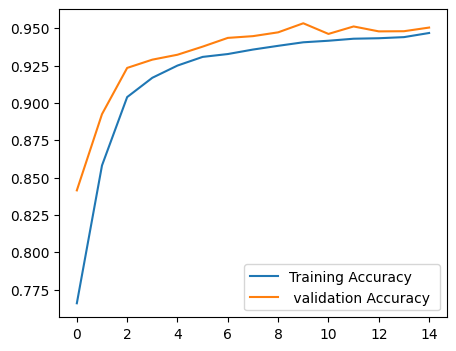

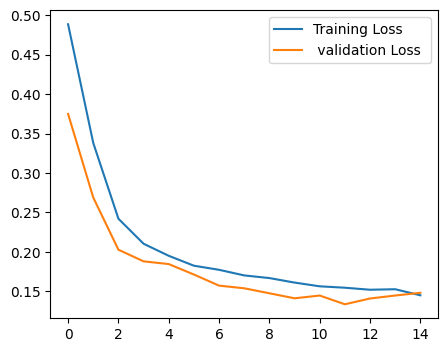

<Figure size 500x400 with 0 Axes>

In [ ]:
plt.plot( model_Learnability.history['accuracy'] , label='Training Accuracy ' )
plt.plot(model_Learnability.history['val_accuracy'], label=' validation Accuracy ' )
plt . legend()
plt . show()
plt.savefig('Training & validation')

plt.plot( model_Learnability.history['loss'] , label='Training Loss ' )
plt.plot(model_Learnability.history['val_loss'], label=' validation Loss ' )
plt . legend()
plt . show()
plt.savefig('Training & validation')

### **Model testing on completely new dataset!**


In [ ]:
# Test Data Prediction
import math
from keras.preprocessing.image import ImageDataGenerator
test_generator=ImageDataGenerator(rescale = 1/255.0)
test_data=test_generator.flow_from_directory(path_test,
                                           target_size=(150,150),
                                           batch_size=1,
                                           color_mode='rgb',class_mode='categorical',
                                           shuffle=False)

predict=model.predict_generator(generator=test_data, verbose = 1)
predict=predict.round(decimals=2)


score = model.evaluate_generator(test_data)
print("============================================\n")
print('Test loss:', score[0],"\n")
print('Test accuracy:', math.ceil(score[1]*100),'%',"\n")


Found 11649 images belonging to 2 classes.
    8/11649 [..............................] - ETA: 1:23 

<ipython-input-89-273258de6ffe>:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict=model.predict_generator(generator=test_data, verbose = 1)


11649/11649 [==============================] - 42s 4ms/step


<ipython-input-89-273258de6ffe>:15: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_data)



Test loss: 0.10863293707370758 

Test accuracy: 96 % 



In [ ]:
File_Name_Testing=test_data.filenames  # sequential list of name of test files of each sample
Labels=test_data.labels # is a sequential list  of test labels for each image sample
Gender_Categories= test_data.class_indices # a dictionary where key is the class name and value is the corresponding label for the class
print (Gender_Categories) # have a look at the dictionary
Dict={}
y_tr=[]
y_pr=[]
for Class in Gender_Categories: # set key in new_dict to value in class_dict and value in new_dict to key in class_dict
    value=Gender_Categories[Class]
    Dict[value]=Class
print('PREDICTED CLASS  TRUE CLASS       FILENAME ' ) # adjust spacing based on your class names
for i, p in enumerate(predict):
    Highest_Pred=np.argmax(p) # get the index that has the highest probability
    Gender=Dict[Highest_Pred]  # find the predicted class based on the index
    True_Gender=Dict[Labels[i]] # use the test label to get the true class of the test file
    file= path_test + File_Name_Testing[i]
    # print(f'    {Gender}       {True_Gender}       {file}')
        # Load and display the image

    if(True_Gender=="male"):
      y_tr.append(1)
    else:
      y_tr.append(0)
    if(Gender=="male"):
      y_pr.append(1)
    else:
      y_pr.append(0)




{'female': 0, 'male': 1}
PREDICTED CLASS  TRUE CLASS       FILENAME 


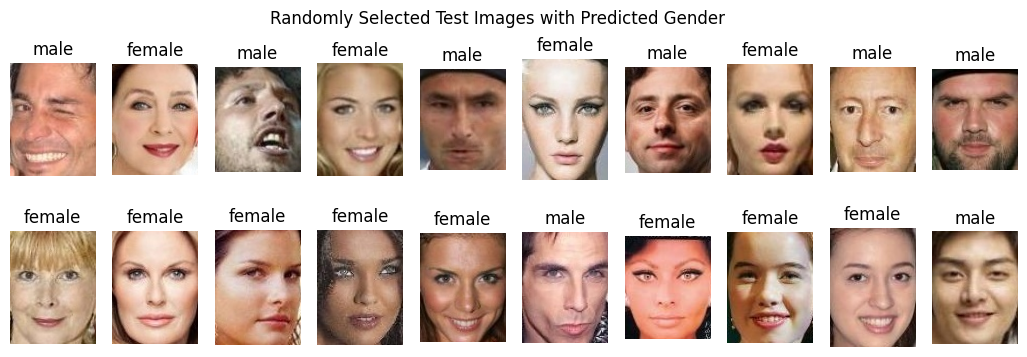

In [ ]:
import random
import matplotlib.pyplot as plt
import cv2

# Assuming you have a list of test image file names and labels
# File_Name_Testing, Labels, and Gender_Categories should be defined

# Select 10 random indices from the test data
random_indices = random.sample(range(len(File_Name_Testing)), 20)

# Create a subplot to display the images
fig, axs = plt.subplots(2, 10, figsize=(13, 4))
fig.suptitle("Randomly Selected Test Images with Predicted Gender")

for i, ax in enumerate(axs.flat):
    index = random_indices[i]
    file_name = File_Name_Testing[index]
    true_gender = Dict[Labels[index]]

    # Get the predicted gender based on the index
    predicted_gender = Dict[np.argmax(predict[index])]

    # Load and display the image
    image = cv2.imread(path_test + file_name)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    ax.set_title(predicted_gender)
    ax.axis('off')

plt.show()


              precision    recall  f1-score   support

           0       0.96      0.95      0.96      5841
           1       0.95      0.96      0.96      5808

    accuracy                           0.96     11649
   macro avg       0.96      0.96      0.96     11649
weighted avg       0.96      0.96      0.96     11649

[[5575  266]
 [ 236 5572]]


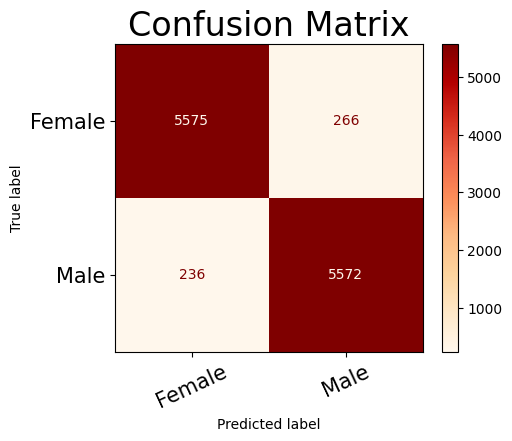

In [ ]:
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
    confusion_mtx = confusion_matrix(y_tr,y_pr)
    print(classification_report(y_tr, y_pr))
    print(confusion_mtx)
    labels = ['Female', 'Male']


    %matplotlib inline
    plt.rcParams['figure.figsize'] = (5.0, 4.0)
    plt.rcParams['font.size'] = 10
    display_c_m = ConfusionMatrixDisplay(confusion_mtx, display_labels=labels)
    display_c_m.plot(cmap='OrRd', xticks_rotation=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('Confusion Matrix', fontsize=24)
    plt.savefig('confusion_matrix.png', transparent=True, dpi=500)
    plt.show()


1/1 [==============================] - 0s 19ms/step


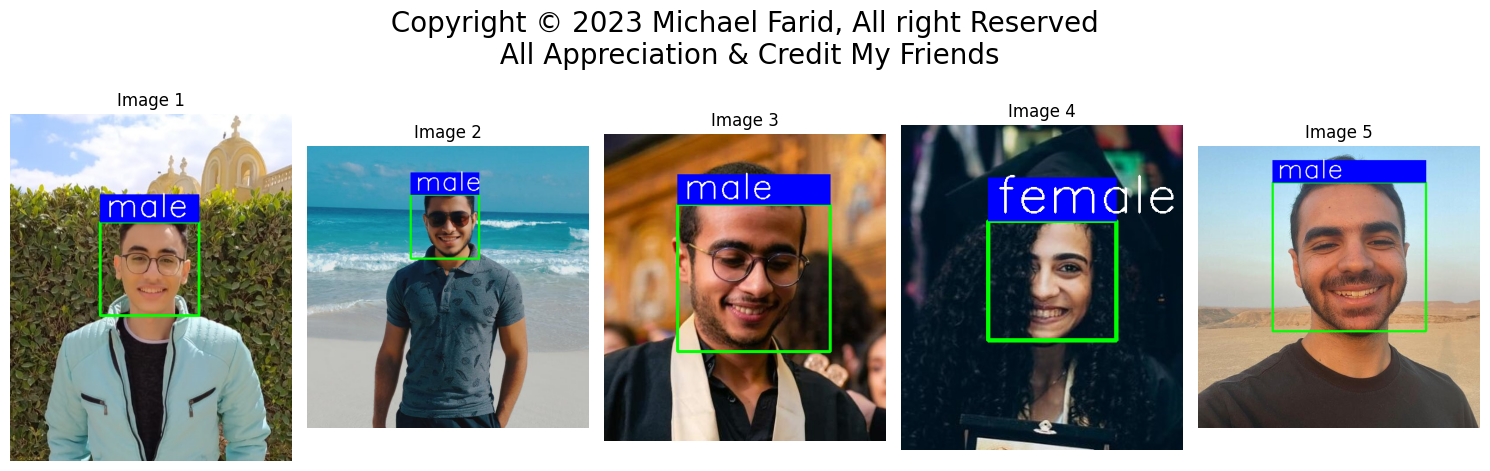

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the face detection cascade classifier
cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

def checking(img):
    label = {0: "female", 1: "male"}
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = cascade.detectMultiScale(gray, 1.1, 7)

    for x, y, w, h in faces:
        face = image[y:y+h, x:x+w]
        face = cv2.resize(face, (150, 150))
        img_scaled = face / 255.0
        reshape = np.reshape(img_scaled, (1, 150, 150, 3))
        img = np.vstack([reshape])
        result = np.argmax(model.predict(img), axis=-1)

        if result == 0:
            cv2.rectangle(image, (x - 10, y), (x + w, y + h), (0, 255, 0), 4)
            cv2.rectangle(image, (x - 10, y - 50), (x + w, y), (255, 0, 0), -1)
            cv2.putText(image, label[0], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2)
        elif result == 1:
            cv2.rectangle(image, (x - 10, y), (x + w, y + h), (0, 255, 0), 4)
            cv2.rectangle(image, (x - 10, y - 50), (x + w, y), (255, 0, 0), -1)
            cv2.putText(image, label[1], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2)

    return image

# List of image file paths
image_paths = ["/content/Mickey.jpeg",
               "/content/343010592_280141445016776_3454802654753934045_n.jpg",
               "/content/Dou7.jpg","/content/Kermina.jpg","/content/Phipo.jpg"]

# Process each image and store the results
result_images = []
for image_path in image_paths:
    result_images.append(checking(image_path))

# Display all the processed images
fig, axes = plt.subplots(1, len(result_images), figsize=(15, 5))
for i, (result_image, ax) in enumerate(zip(result_images, axes)):
    ax.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    ax.set_title(f"Image {i + 1}")
    ax.axis("off")
# Add a central label above the images
plt.suptitle(" Copyright © 2023 Michael Farid, All right Reserved \n All Appreciation & Credit My Friends",  fontsize=20)

plt.tight_layout()
plt.show()


## Gender Classification Project Summary:
Developed a robust ML model to predict gender labels from diverse image data.
Utilized OpenCV and Matplotlib for data visualization and evaluation.
Excited to showcase the project results!


```
Mickey 👋

```


